In [19]:
import numpy as np
import pandas as pd
from Square import Square
import os

points_in_square = pd.read_csv("/home/SOMPython/points_to_analize.csv")
points_in_square = points_in_square.values

square = Square(points_in_square, 0, 0)

In [20]:
square.randomize_points(0)

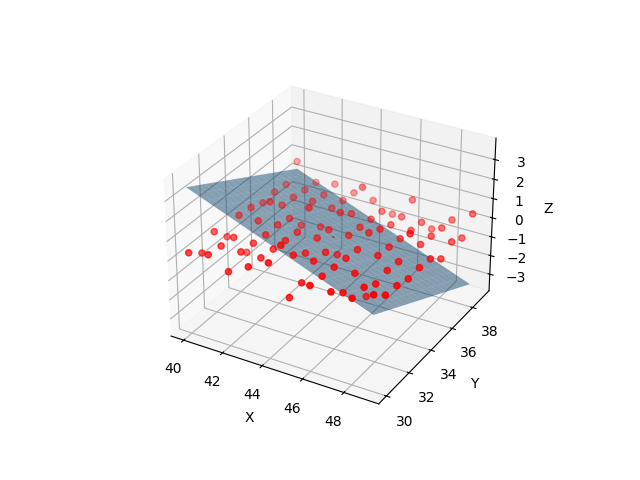

In [21]:
%matplotlib ipympl
import matplotlib.pyplot as plt
normal_x, normal_y, normal_Z = square.svd_method()
centroid = square.points.mean(axis=0)
# Create grid values
x = np.linspace(min(square.points[:,0]), max(square.points[:,0]),20) #x i y są zamienione miejscami ???
y = np.linspace(min(square.points[:,1]), max(square.points[:,1]),20)
xx, yy = np.meshgrid(x, y)
d = normal_x * centroid[0] + normal_y * centroid[1] + normal_Z * centroid[2]
# Calculate Z values
Z = (-normal_x * xx - normal_y * yy + d) / normal_Z

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(square.points[:,0], square.points[:,1], square.points[:,2], c='r', marker='o')  # c - kolor,  marker - kształt punktoru

ax.plot_surface(xx, yy, Z, alpha=0.5)
ax.quiver(centroid[0], centroid[1], centroid[2], normal_x, normal_y, normal_Z, color='red',linewidths=2)
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()